In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

## FEATURES:

## PlayerID: Unique identifier for each player

## Age: Age of the player

## Gender: Gender of the player

## Location: Geographic location of the player

## GameGenre: Genre of the game the player is engaged in

## PlayTimeHours: Average hours spent playing per session

## InGamePurchases: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes)

## GameDifficulty: Difficulty level of the game

## SessionsPerWeek: Number of gaming sessions per week

## AvgSessionDurationMinutes: Average duration of each gaming session in minutes

## PlayerLevel: Current level of the player in the game

## AchievementsUnlocked: Number of achievements unlocked by the player

## EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/game/online_gaming_behavior_dataset.csv'

### Load the Data

In [5]:
data = pd.read_csv(path)
data

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


### Show general information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

### Show number of rows and columns

In [ ]:
data.shape

(40034, 13)

### Show first 5 rows

In [9]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [8]:
data.tail()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium
40033,49033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,Medium


## Data Cleaning and Data Manipulation

### Drop column 'PlayerID'

In [ ]:
data.drop(columns = ['PlayerID'], inplace = True)

### column 'PlayTimeHours' ---> round 2 digit

In [ ]:
data['PlayTimeHours'] = data['PlayTimeHours'].round(2)


### Replace 0 with No , 1 with Yes (column 'InGamePurchases')

In [ ]:
data['InGamePurchases'] =data['InGamePurchases'].map({0: 'No', 1: 'Yes'})

### Show first 5 rows again

In [ ]:
data.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.27,No,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.53,No,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.22,No,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.27,Yes,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.53,No,Medium,2,131,95,37,Medium


### Checking for Missing Values

In [ ]:
data.isna().sum()

,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0
PlayerLevel,0


### Total of Missing Values

In [10]:
data.isna().sum().sum()

0

### Checking for Duplicates

In [11]:
data.duplicated().sum()

0

## Show Numeric and Categorical Features

In [ ]:
data.select_dtypes(include = 'number').columns

Index(['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
       'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [ ]:
len(data.select_dtypes(include = 'number').columns)

6

In [ ]:
data.select_dtypes(include = 'object').columns

Index(['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty',
       'EngagementLevel'],
      dtype='object')

In [ ]:
len(data.select_dtypes(include = 'object').columns)

6

### Show Descriptive Statistics for Numeric Features

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


### Show Numeric and Categorical Features separately

In [ ]:
data_numeric = data[['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']]

data_categorical = data[['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty']]

## Show Distributions of Numeric Features

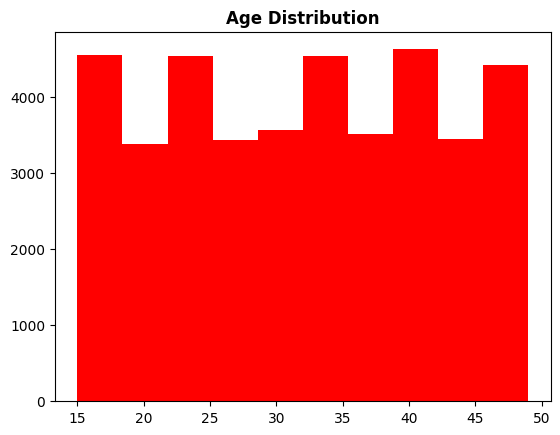

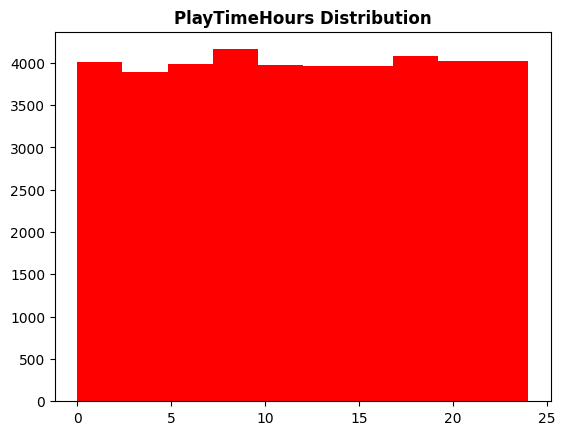

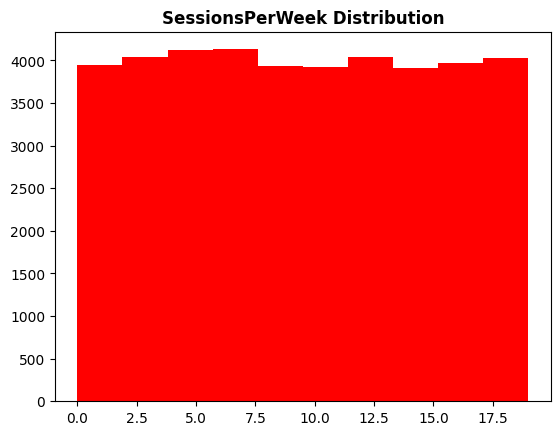

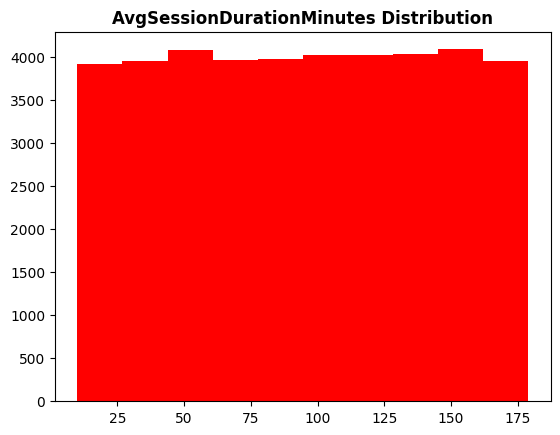

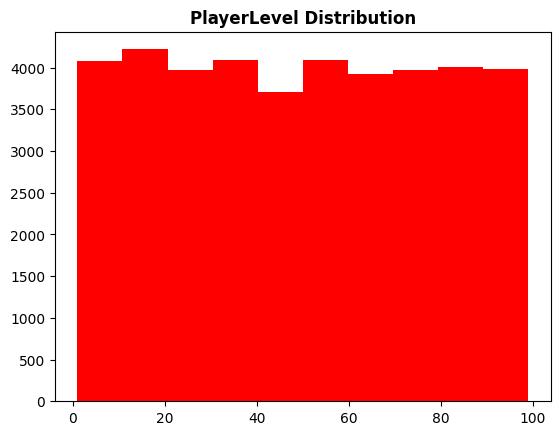

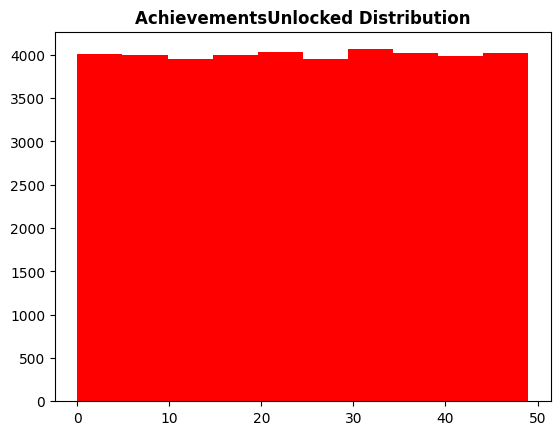

In [ ]:
for i in data_numeric.columns:
    plt.hist(x = data_numeric[i], color = 'red')
    plt.title(i + ' Distribution', weight = 'bold')
    plt.show()
    print()

### Show Correlation of Numeric Features

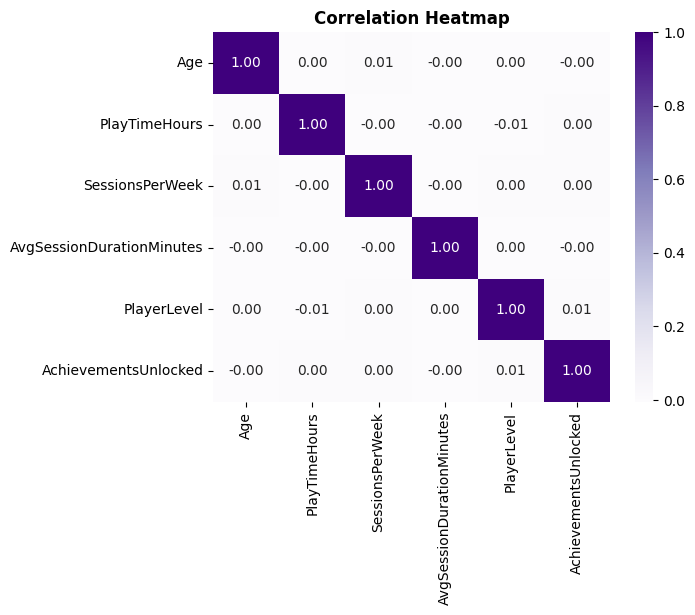

In [ ]:
sns.heatmap(data = data_numeric.corr(), annot = True, fmt = '.2f',  cmap = "Purples")

plt.title('Correlation Heatmap', weight = 'bold')

plt.show()

## Visualizing of Categorical Features

In [ ]:
data_categorical.columns

Index(['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty'], dtype='object')

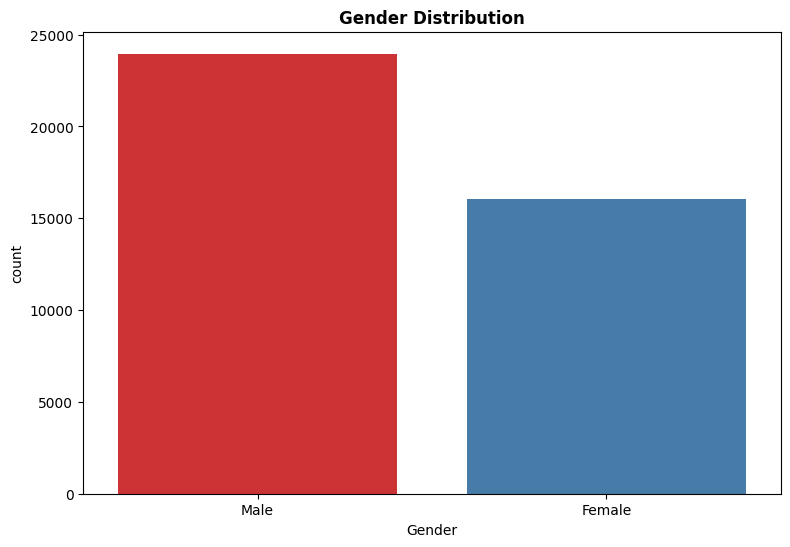

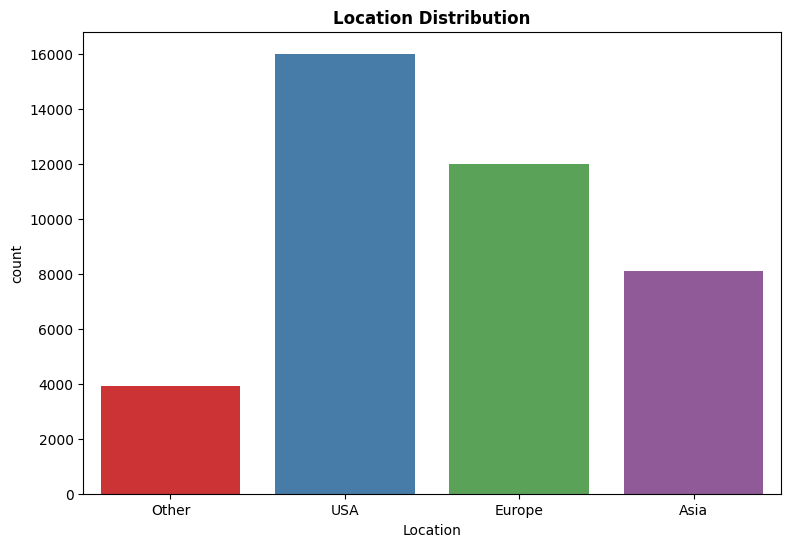

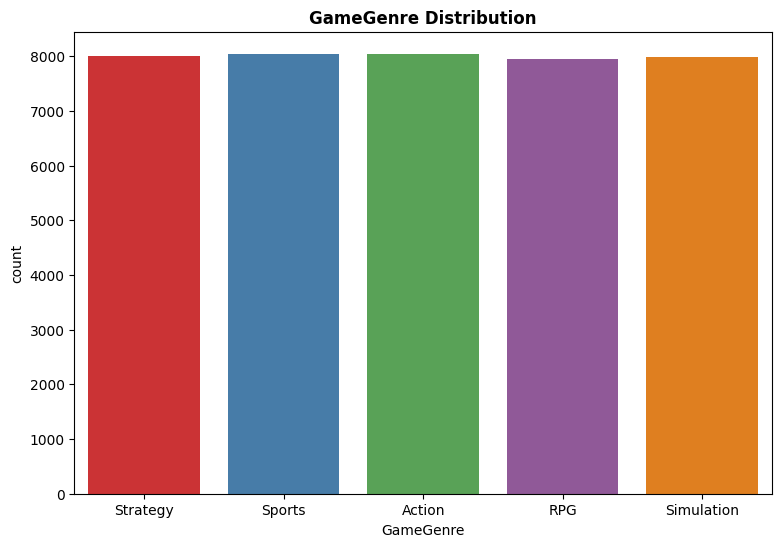

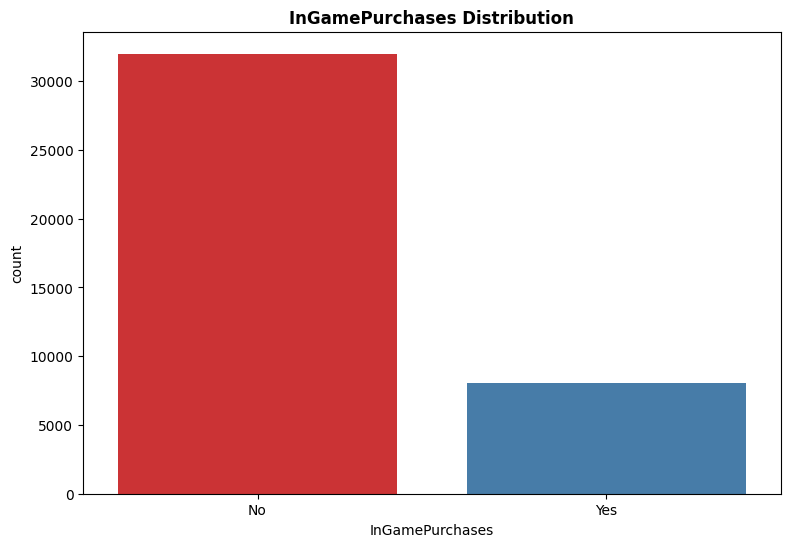

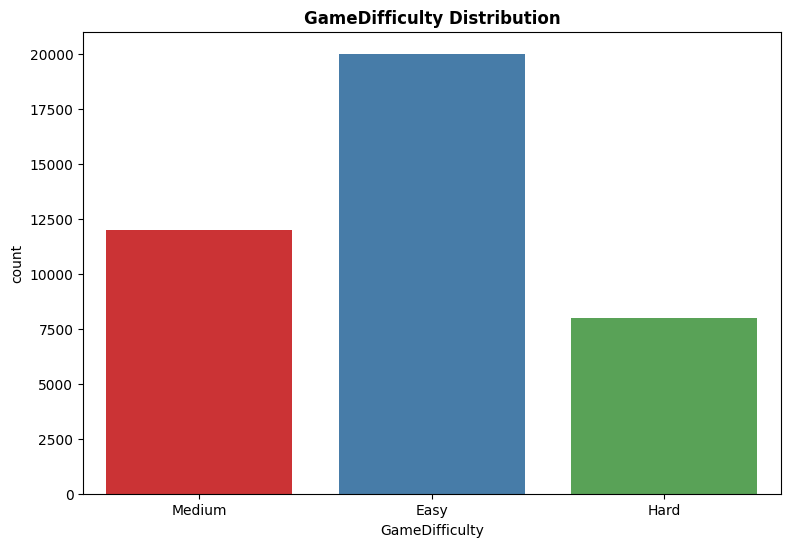

In [ ]:
for i in data_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + ' Distribution', weight = 'bold')
    sns.countplot(x = data_categorical[i], palette = 'Set1')
    plt.show()
    print()

In [ ]:
data_categorical.columns

Index(['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty'], dtype='object')

### Show value counts information of Categorical Features

In [ ]:
data_categorical_list = [data['Gender'], data['Location'], data['GameGenre'], data['InGamePurchases'], data['GameDifficulty']]

for i in data_categorical_list:
    print('value counts: ')
    print(i.value_counts())
    print()
    print('by percentage: ')
    print(i.value_counts(normalize = True).round(2))
    print('-------------------------')

value counts: 
Gender
Male      23959
Female    16075
Name: count, dtype: int64

by percentage: 
Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64
-------------------------
value counts: 
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

by percentage: 
Location
USA       0.4
Europe    0.3
Asia      0.2
Other     0.1
Name: proportion, dtype: float64
-------------------------
value counts: 
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

by percentage: 
GameGenre
Sports        0.2
Action        0.2
Strategy      0.2
Simulation    0.2
RPG           0.2
Name: proportion, dtype: float64
-------------------------
value counts: 
InGamePurchases
No     31993
Yes     8041
Name: count, dtype: int64

by percentage: 
InGamePurchases
No     0.8
Yes    0.2
Name: proportion, dtype: float64
-------------------------
value counts: 
GameDifficulty
Easy 

## Categorical Features - 'EngagementLevel'(target) Relationship

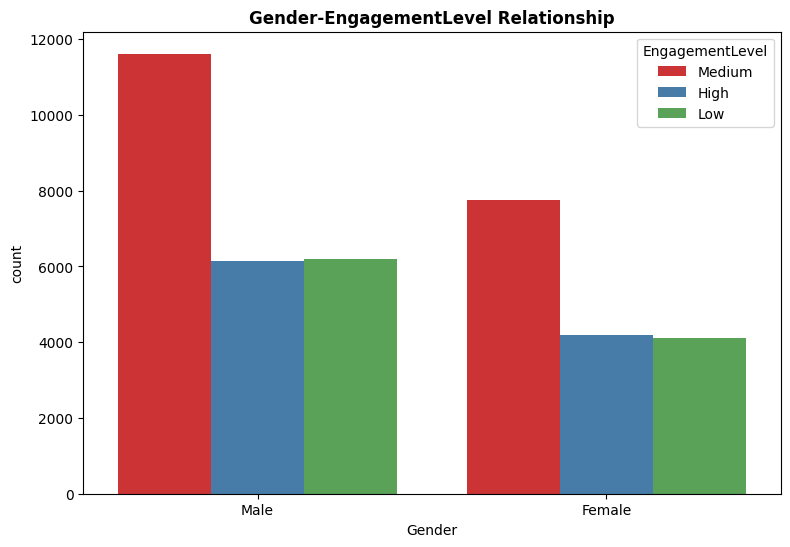

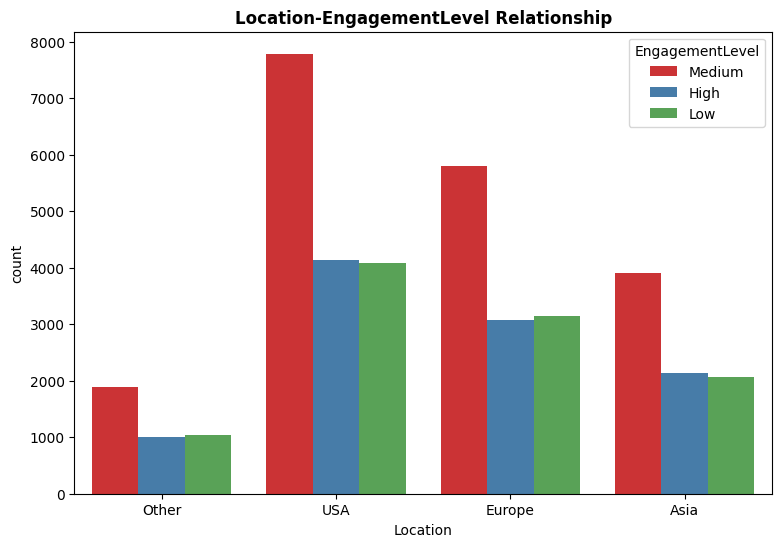

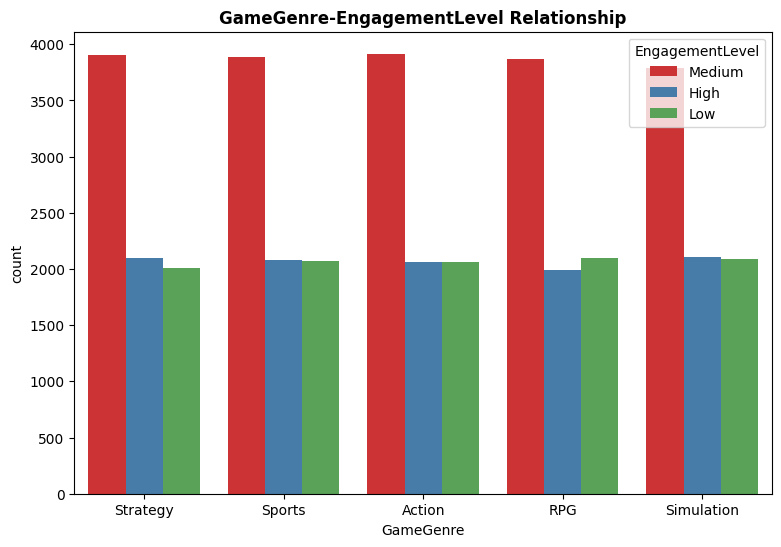

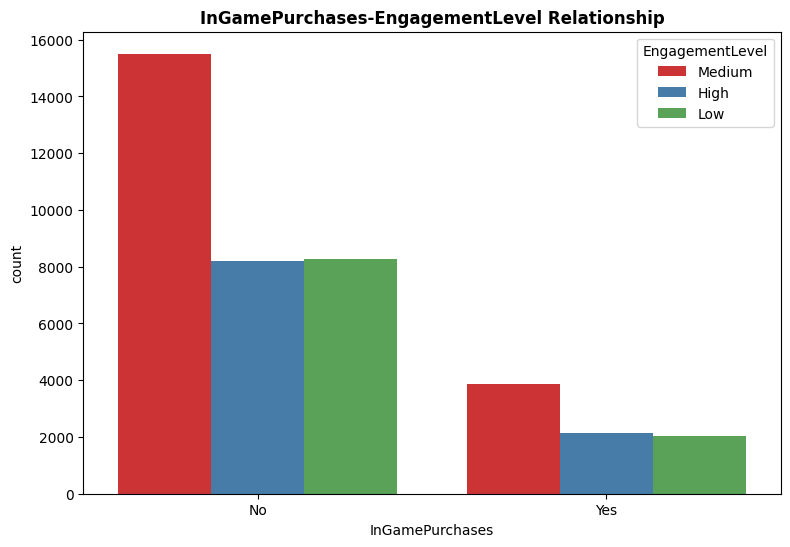

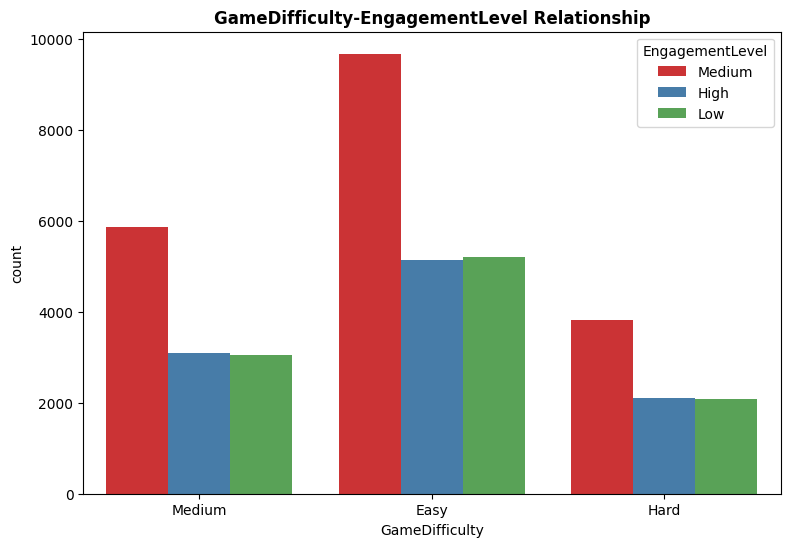

In [ ]:
for i in data_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + '-EngagementLevel Relationship', weight = 'bold')
    sns.countplot(x = data_categorical[i], hue = data['EngagementLevel'], palette = 'Set1')
    plt.show()
    print()

## 'EngagementLevel' (target) Distribution

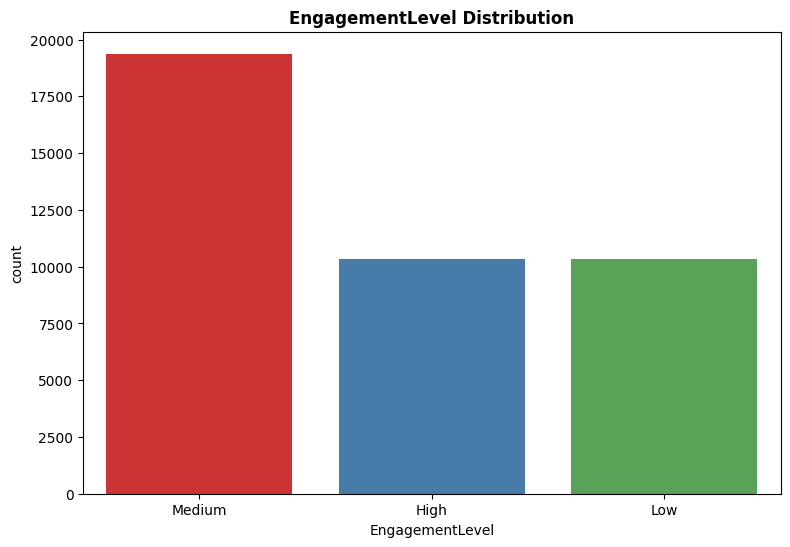

In [ ]:
plt.figure(figsize = (9,6))
plt.title('EngagementLevel Distribution', weight = 'bold')
sns.countplot(x = data['EngagementLevel'], palette = 'Set1')
plt.show()

### Show value counts information of 'EngagementLevel'

In [ ]:
data['EngagementLevel'].value_counts()

,count
EngagementLevel,
Medium,19374
High,10336
Low,10324


In [ ]:
data['EngagementLevel'].value_counts(normalize = True).round(2)

,proportion
EngagementLevel,
Medium,0.48
High,0.26
Low,0.26


### Show first 3 rows

In [ ]:
data.head(3)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.27,No,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.53,No,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.22,No,Easy,16,142,35,41,High


## Detailed Data Analysis

### 'Gender' - 'Location'

In [ ]:
field1 = data['Gender']
field2 = data['Location']

cross_table = pd.crosstab(field1,field2)
cross_table

Location,Asia,Europe,Other,USA
Gender,,,,
Female,3251,4762,1580,6482
Male,4844,7242,2355,9518


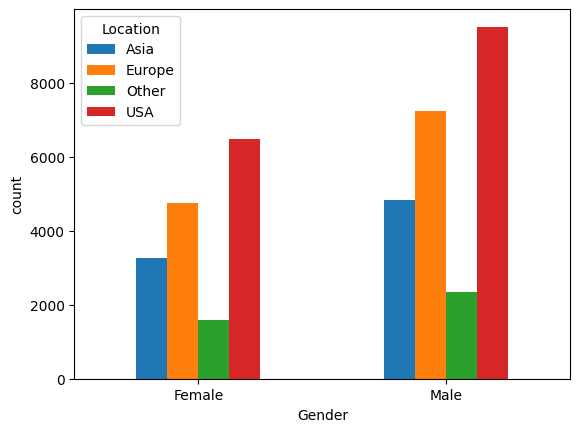

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'Gender' - 'GameGenre'

In [ ]:
field1 = data['Gender']
field2 = data['GameGenre']

cross_table = pd.crosstab(field1,field2)
cross_table

GameGenre,Action,RPG,Simulation,Sports,Strategy
Gender,,,,,
Female,3149,3235,3218,3243,3230
Male,4890,4717,4765,4805,4782


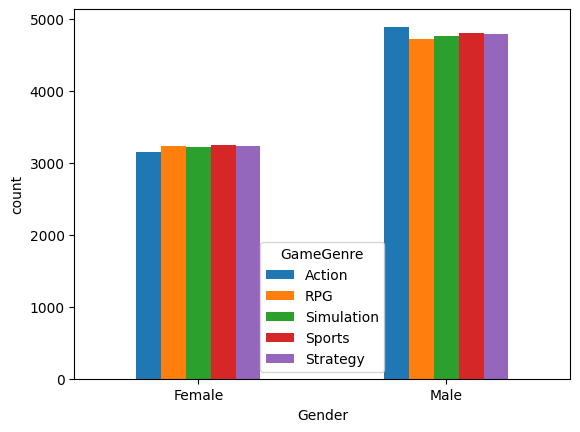

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### ('Gender','Location') - 'PlayTimeHours'

In [ ]:
data.groupby(['Gender', 'Location']).agg({'PlayTimeHours': ['min', 'max', 'mean']})

PlayTimeHours                  
                          min    max       mean
Gender Location                                
Female Asia              0.00  24.00  12.096084
       Europe            0.01  23.99  11.878627
       Other             0.01  23.99  12.106987
       USA               0.00  23.99  11.939064
Male   Asia              0.01  24.00  12.260582
       Europe            0.00  23.99  11.966124
       Other             0.01  24.00  12.030174
       USA               0.00  24.00  12.039920

### ('Gender','GameGenre') - 'PlayTimeHours'

In [ ]:
data.groupby(['Gender', 'GameGenre']).agg({'PlayTimeHours': ['min', 'max', 'mean']})

PlayTimeHours                  
                            min    max       mean
Gender GameGenre                                 
Female Action              0.00  23.99  11.990975
       RPG                 0.00  23.99  11.957224
       Simulation          0.00  24.00  12.044723
       Sports              0.00  23.99  11.888057
       Strategy            0.00  23.99  11.967291
Male   Action              0.01  24.00  12.276558
       RPG                 0.00  23.99  12.043025
       Simulation          0.00  24.00  11.799079
       Sports              0.01  24.00  12.022604
       Strategy            0.00  23.99  12.159224

### 'Gender' - 'InGamePurchases'

In [ ]:
field1 = data['Gender']
field2 = data['InGamePurchases']

cross_table = pd.crosstab(field1,field2)
cross_table

InGamePurchases,No,Yes
Gender,,
Female,12895,3180
Male,19098,4861


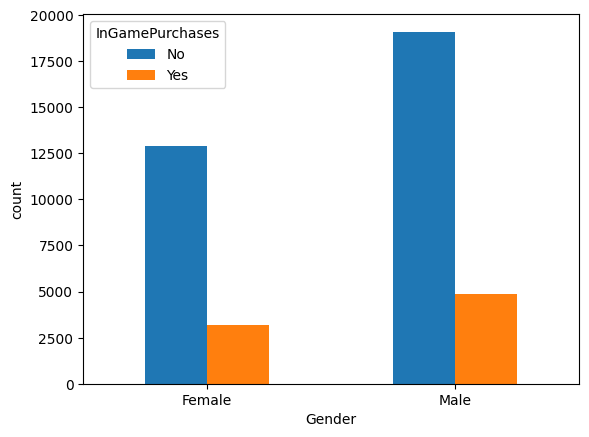

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'Gender' - 'GameDifficulty'

In [ ]:
field1 = data['Gender']
field2 = data['GameDifficulty']

cross_table = pd.crosstab(field1,field2)
cross_table

GameDifficulty,Easy,Hard,Medium
Gender,,,
Female,8084,3234,4757
Male,11931,4774,7254


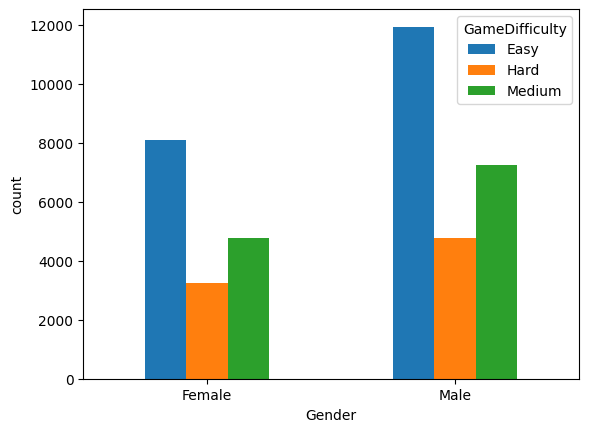

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### ('Gender','GameGenre') - 'PlayerLevel'

In [ ]:
data.groupby(['Gender', 'GameGenre']).agg({'PlayerLevel': ['min', 'max', 'mean']})

PlayerLevel               
                          min max       mean
Gender GameGenre                            
Female Action               1  99  49.452207
       RPG                  1  99  48.956105
       Simulation           1  99  49.537290
       Sports               1  99  49.252236
       Strategy             1  99  49.922910
Male   Action               1  99  50.028630
       RPG                  1  99  49.761077
       Simulation           1  99  49.048269
       Sports               1  99  50.321748
       Strategy             1  99  49.885404

### ('Gender','GameDifficulty') - 'PlayerLevel'

In [ ]:
data.groupby(['Gender', 'GameDifficulty']).agg({'PlayerLevel': ['min', 'max', 'mean']})

PlayerLevel               
                              min max       mean
Gender GameDifficulty                           
Female Easy                     1  99  49.332509
       Hard                     1  99  49.857452
       Medium                   1  99  49.283582
Male   Easy                     1  99  49.632638
       Hard                     1  99  50.049016
       Medium                   1  99  49.948304

### ('Gender','GameGenre','GameDifficulty') - 'PlayerLevel'

In [ ]:
data.groupby(['Gender', 'GameGenre', 'GameDifficulty']).agg({'PlayerLevel': ['min', 'max', 'mean']})

PlayerLevel               
                                         min max       mean
Gender GameGenre  GameDifficulty                           
Female Action     Easy                     1  99  49.512210
                  Hard                     1  99  49.484751
                  Medium                   1  99  49.327234
       RPG        Easy                     1  99  48.638390
                  Hard                     1  99  50.563319
                  Medium                   1  99  48.322615
       Simulation Easy                     1  99  49.728349
                  Hard                     1  99  48.186047
                  Medium                   1  99  50.120868
       Sports     Easy                     1  99  48.742015
                  Hard                     1  99  50.190698
                  Medium                   1  99  49.484536
       Strategy   Easy                     1  99  50.040268
                  Hard                     1  99  50.820189
                  Medium                   1  99  49.127482
Male   Action     Easy                     1  99  50.010787
                  Hard                     1  99  51.162105
                  Medium                   1  99  49.310369
       RPG        Easy                     1  99  49.038244
                  Hard                     1  99  50.068966
                  Medium                   1  99  50.711888
       Simulation Easy                     1  99  48.854927
                  Hard                     1  99  49.591432
                  Medium                   1  99  49.007027
       Sports     Easy                     1  99  50.798831
                  Hard                     1  99  49.365180
                  Medium                   1  99  50.156783
       Strategy   Easy                     1  99  49.411765
                  Hard                     1  99  50.054313
                  Medium                   1  99  50.521710

### ('Gender','GameGenre') - 'AchievementsUnlocked'

In [ ]:
data.groupby(['Gender', 'GameGenre']).agg({'AchievementsUnlocked': ['min', 'max', 'mean']})

AchievementsUnlocked               
                                   min max       mean
Gender GameGenre                                     
Female Action                        0  49  24.127660
       RPG                           0  49  24.395054
       Simulation                    0  49  24.665320
       Sports                        0  49  24.490287
       Strategy                      0  49  24.614241
Male   Action                        0  49  24.875869
       RPG                           0  49  24.602714
       Simulation                    0  49  24.478909
       Sports                        0  49  24.334443
       Strategy                      0  49  24.557716

### ('Gender','GameDifficulty') - 'AchievementsUnlocked'

In [ ]:
data.groupby(['Gender', 'GameDifficulty']).agg({'AchievementsUnlocked': ['min', 'max', 'mean']})

AchievementsUnlocked               
                                       min max       mean
Gender GameDifficulty                                    
Female Easy                              0  49  24.414646
       Hard                              0  49  24.255411
       Medium                            0  49  24.676267
Male   Easy                              0  49  24.613193
       Hard                              0  49  24.147256
       Medium                            0  49  24.780673

### ('Gender','GameGenre','GameDifficulty') - 'AchievementsUnlocked'

In [ ]:
data.groupby(['Gender', 'GameGenre', 'GameDifficulty']).agg({'AchievementsUnlocked': ['min', 'max', 'mean']})

AchievementsUnlocked               
                                                  min max       mean
Gender GameGenre  GameDifficulty                                    
Female Action     Easy                              0  49  24.096431
                  Hard                              0  49  24.250401
                  Medium                            0  49  24.099031
       RPG        Easy                              0  49  24.389474
                  Hard                              0  49  24.417758
                  Medium                            0  49  24.387996
       Simulation Easy                              0  49  24.816199
                  Hard                              0  49  24.331783
                  Medium                            0  49  24.637397
       Sports     Easy                              0  49  24.487101
                  Hard                              0  49  23.796899
                  Medium                            0  49  24.956701
       Strategy   Easy                              0  49  24.284320
                  Hard                              0  49  24.473186
                  Medium                            0  49  25.272727
Male   Action     Easy                              0  49  25.053935
                  Hard                              0  49  23.977895
                  Medium                            0  49  25.159360
       RPG        Easy                              0  49  24.546284
                  Hard                              0  49  24.100406
                  Medium                            0  49  25.039860
       Simulation Easy                              0  49  24.621803
                  Hard                              0  49  24.284222
                  Medium                            0  49  24.370344
       Sports     Easy                              0  49  24.205760
                  Hard                              0  49  23.974522
                  Medium                            0  49  24.775733
       Strategy   Easy                              0  49  24.615942
                  Hard                              0  49  24.401491
                  Medium                            0  49  24.564462

### 'Gender' - 'EngagementLevel'

In [ ]:
field1 = data['Gender']
field2 = data['EngagementLevel']

cross_table = pd.crosstab(field1,field2)
cross_table

EngagementLevel,High,Low,Medium
Gender,,,
Female,4196,4121,7758
Male,6140,6203,11616


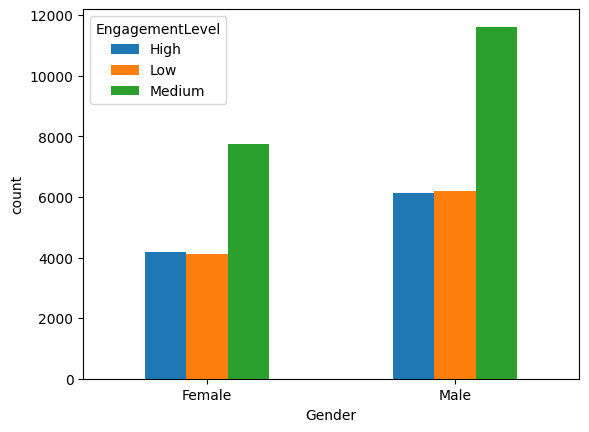

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### ('Location','GameGenre') - 'AchievementsUnlocked'

In [ ]:
data.groupby(['Location', 'GameGenre']).agg({'AchievementsUnlocked': ['min', 'max', 'mean']})

AchievementsUnlocked               
                                     min max       mean
Location GameGenre                                     
Asia     Action                        0  49  24.591184
         RPG                           0  49  24.733333
         Simulation                    0  49  24.329020
         Sports                        0  49  24.568900
         Strategy                      0  49  24.721190
Europe   Action                        0  49  24.755354
         RPG                           0  49  24.964165
         Simulation                    0  49  24.190141
         Sports                        0  49  24.527766
         Strategy                      0  49  24.336159
Other    Action                        0  49  23.765152
         RPG                           0  49  23.623888
         Simulation                    0  49  25.345912
         Sports                        0  49  23.989677
         Strategy                      0  49  24.035623
USA      Action                        0  49  24.650648
         RPG                           0  49  24.296880
         Simulation                    0  49  24.748969
         Sports                        0  49  24.313497
         Strategy                      0  49  24.819551

### 'Location' - 'InGamePurchases'

In [ ]:
field1 = data['Location']
field2 = data['InGamePurchases']

cross_table = pd.crosstab(field1,field2)
cross_table

InGamePurchases,No,Yes
Location,,
Asia,6435,1660
Europe,9561,2443
Other,3175,760
USA,12822,3178


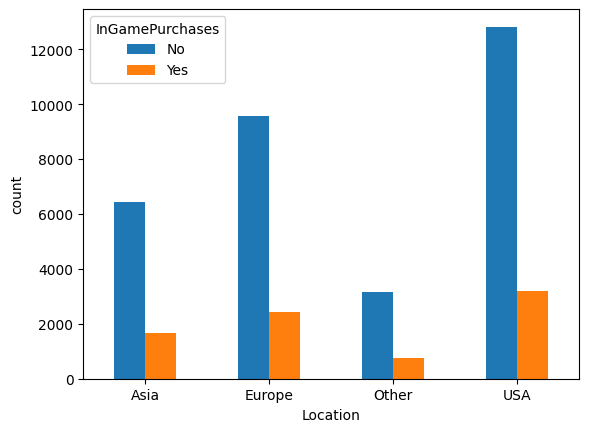

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'Location' - 'PlayTimeHours'

In [ ]:
data.groupby(['Location']).agg({'PlayTimeHours': ['min', 'max', 'mean']})

PlayTimeHours                  
                   min    max       mean
Location                                
Asia              0.00  24.00  12.194519
Europe            0.00  23.99  11.931414
Other             0.01  24.00  12.061017
USA               0.00  24.00  11.999061

### ('Location','GameGenre') - 'PlayTimeHours'

In [ ]:
data.groupby(['Location', 'GameGenre']).agg({'PlayTimeHours': ['min', 'max', 'mean']})

PlayTimeHours                  
                              min    max       mean
Location GameGenre                                 
Asia     Action              0.01  24.00  12.302717
         RPG                 0.00  23.99  12.301852
         Simulation          0.03  24.00  11.940943
         Sports              0.01  23.96  12.202453
         Strategy            0.00  23.99  12.222986
Europe   Action              0.02  23.99  12.151466
         RPG                 0.00  23.99  11.833929
         Simulation          0.01  23.99  11.849693
         Sports              0.03  23.99  11.833410
         Strategy            0.00  23.99  11.987567
Other    Action              0.02  23.99  12.286086
         RPG                 0.01  23.83  12.043304
         Simulation          0.04  24.00  12.009409
         Sports              0.04  24.00  11.889329
         Strategy            0.01  23.93  12.073448
USA      Action              0.00  24.00  12.072181
         RPG                 0.00  23.99  11.979644
         Simulation          0.00  23.99  11.885033
         Sports              0.00  23.99  11.974248
         Strategy            0.00  23.99  12.082219

### 'Location' - 'EngagementLevel'

In [ ]:
field1 = data['Location']
field2 = data['EngagementLevel']

cross_table = pd.crosstab(field1,field2)
cross_table

EngagementLevel,High,Low,Medium
Location,,,
Asia,2131,2058,3906
Europe,3068,3143,5793
Other,1010,1036,1889
USA,4127,4087,7786


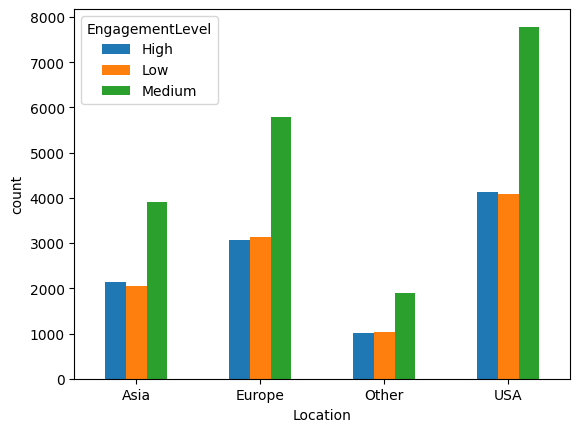

In [ ]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### Show first 5 rows again

In [ ]:
data.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.27,No,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.53,No,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.22,No,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.27,Yes,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.53,No,Medium,2,131,95,37,Medium


## Encoding of Categorical Data

In [ ]:
le = LabelEncoder()

In [ ]:
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
le.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

### 0: Female
### 1: Male

In [ ]:
data['Location'] = le.fit_transform(data['Location'])

In [ ]:
le.inverse_transform([0,1,2,3])

array(['Asia', 'Europe', 'Other', 'USA'], dtype=object)

### 0: Asia
### 1: Europe
### 2: Other
### 3: USA

In [ ]:
data['GameGenre'] = le.fit_transform(data['GameGenre'])

In [ ]:
le.inverse_transform([0,1,2,3,4])

array(['Action', 'RPG', 'Simulation', 'Sports', 'Strategy'], dtype=object)

### 0: Action
### 1: RPG
### 2: Simulation
### 3: Sports
### 4: Strategy

In [ ]:
data['InGamePurchases'] = le.fit_transform(data['InGamePurchases'])

In [ ]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

### 0: No
### 1: Yes

In [ ]:
data['GameDifficulty'] = le.fit_transform(data['GameDifficulty'])

In [ ]:
le.inverse_transform([0,1,2])

array(['Easy', 'Hard', 'Medium'], dtype=object)

### 0: Easy
### 1: Hard
### 2: Medium

In [ ]:
data['EngagementLevel'] = le.fit_transform(data['EngagementLevel'])

In [ ]:
le.inverse_transform([0,1,2])

array(['High', 'Low', 'Medium'], dtype=object)

### 0: High
### 1: Low
### 2: Medium

### Show first 5 rows after encoding of labels

In [ ]:
data.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,1,2,4,16.27,0,2,6,108,79,25,2
1,29,0,3,4,5.53,0,2,5,144,11,10,2
2,22,0,3,3,8.22,0,0,16,142,35,41,0
3,35,1,3,0,5.27,1,0,9,85,57,47,2
4,33,1,1,0,15.53,0,2,2,131,95,37,2


## Define Dependent and Independent Variables

In [ ]:
x = data.drop(columns = ['EngagementLevel']) # inputs

y = data['EngagementLevel']                  # target

In [ ]:
x.shape, y.shape

((40034, 11), (40034,))

### Splitting Data into Training and Testing Sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape, y_train.shape

((32027, 11), (32027,))

In [ ]:
x_test.shape, y_test.shape

((8007, 11), (8007,))

## Decision Tree Classifier

In [ ]:
decision_tree_clf = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', random_state = 42)

decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', random_state=42)

### Predictions based on test data

In [ ]:
decision_tree_predictions = decision_tree_clf.predict(x_test)

print('High', sum(decision_tree_predictions == 0))
print('Low', sum(decision_tree_predictions == 1))
print('Medium', sum(decision_tree_predictions == 2))

High 1922
Low 2040
Medium 4045


### Confusion Matrix

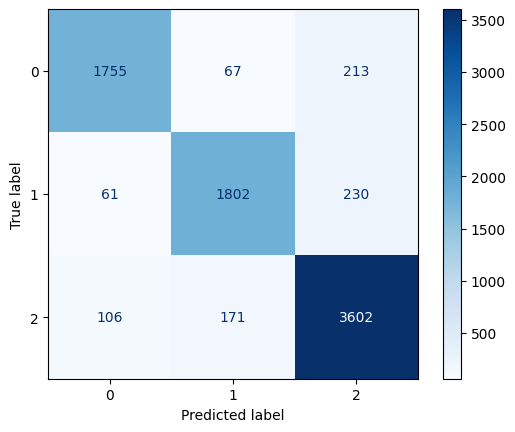

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, decision_tree_predictions,
                                        labels = decision_tree_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2035
           1       0.88      0.86      0.87      2093
           2       0.89      0.93      0.91      3879

    accuracy                           0.89      8007
   macro avg       0.90      0.88      0.89      8007
weighted avg       0.89      0.89      0.89      8007



## Accuracy of Model: 0.89 = 89%

### Feature Engineering

In [ ]:
decision_tree_feature_importances = pd.DataFrame({'Feature': decision_tree_clf.feature_names_in_ ,
                                                  'Importance': decision_tree_clf.feature_importances_})

decision_tree_feature_importances['Importance'] = decision_tree_feature_importances['Importance'].round(4)

decision_tree_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,SessionsPerWeek,0.4829
1,AvgSessionDurationMinutes,0.4784
2,AchievementsUnlocked,0.0199
3,PlayerLevel,0.0188
4,Age,0.0000
5,Gender,0.0000
6,Location,0.0000
7,GameGenre,0.0000
8,PlayTimeHours,0.0000
9,InGamePurchases,0.0000


### Visualizing of Feature Importances

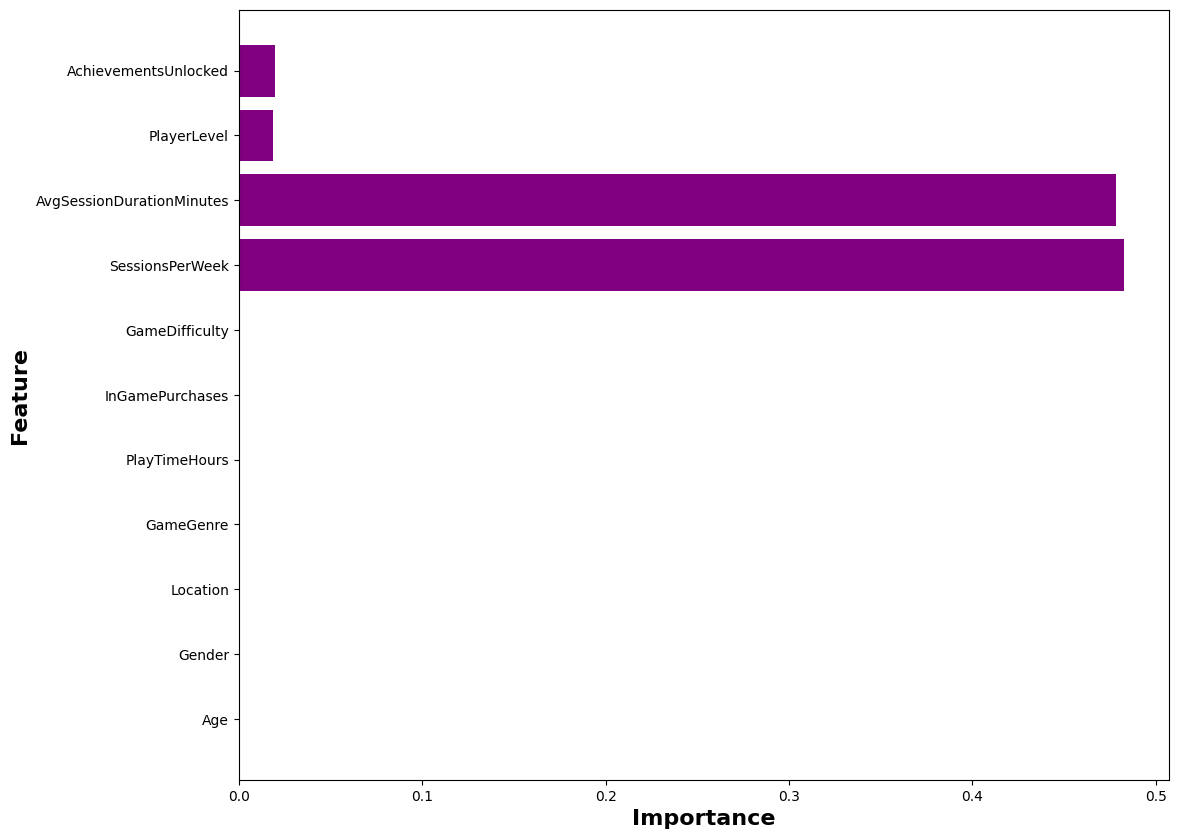

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(decision_tree_feature_importances['Feature'],
         decision_tree_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
decision_tree_feature_importances[decision_tree_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,Age,0.0
1,Gender,0.0
2,Location,0.0
3,GameGenre,0.0
4,PlayTimeHours,0.0
5,InGamePurchases,0.0
6,GameDifficulty,0.0


### These 7 features have not contributed to model

## Random Forest Classifier

In [ ]:
random_forest_clf = RandomForestClassifier(ccp_alpha = 0.0001, criterion = 'entropy', random_state = 42)

random_forest_clf.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.0001, criterion='entropy', random_state=42)

### Predictions based on test data

In [ ]:
random_forest_predictions = random_forest_clf.predict(x_test)

print('High', sum(random_forest_predictions == 0))
print('Low', sum(random_forest_predictions == 1))
print('Medium', sum(random_forest_predictions == 2))

High 1941
Low 2020
Medium 4046


### Confusion Matrix

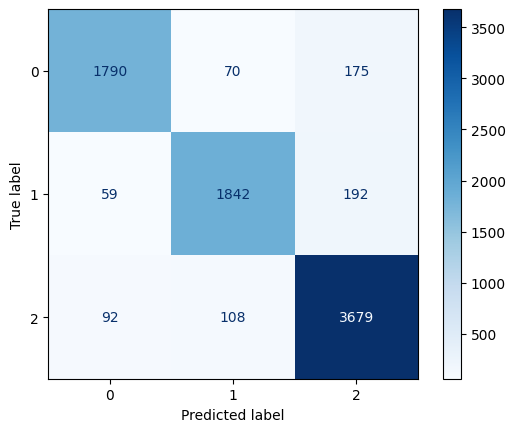

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, random_forest_predictions,
                                        labels = random_forest_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2035
           1       0.91      0.88      0.90      2093
           2       0.91      0.95      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



## Accuracy of Model: 0.91 = 91%

### Feature Engineering

In [ ]:
random_forest_feature_importances = pd.DataFrame({'Feature': random_forest_clf.feature_names_in_ ,
                                                  'Importance': random_forest_clf.feature_importances_})

random_forest_feature_importances['Importance'] = random_forest_feature_importances['Importance'].round(4)

random_forest_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,SessionsPerWeek,0.3870
1,AvgSessionDurationMinutes,0.3419
2,PlayerLevel,0.0572
3,PlayTimeHours,0.0565
4,AchievementsUnlocked,0.0526
5,Age,0.0428
6,GameGenre,0.0196
7,Location,0.0159
8,GameDifficulty,0.0122
9,Gender,0.0078


### Visualizing of Feature Importances

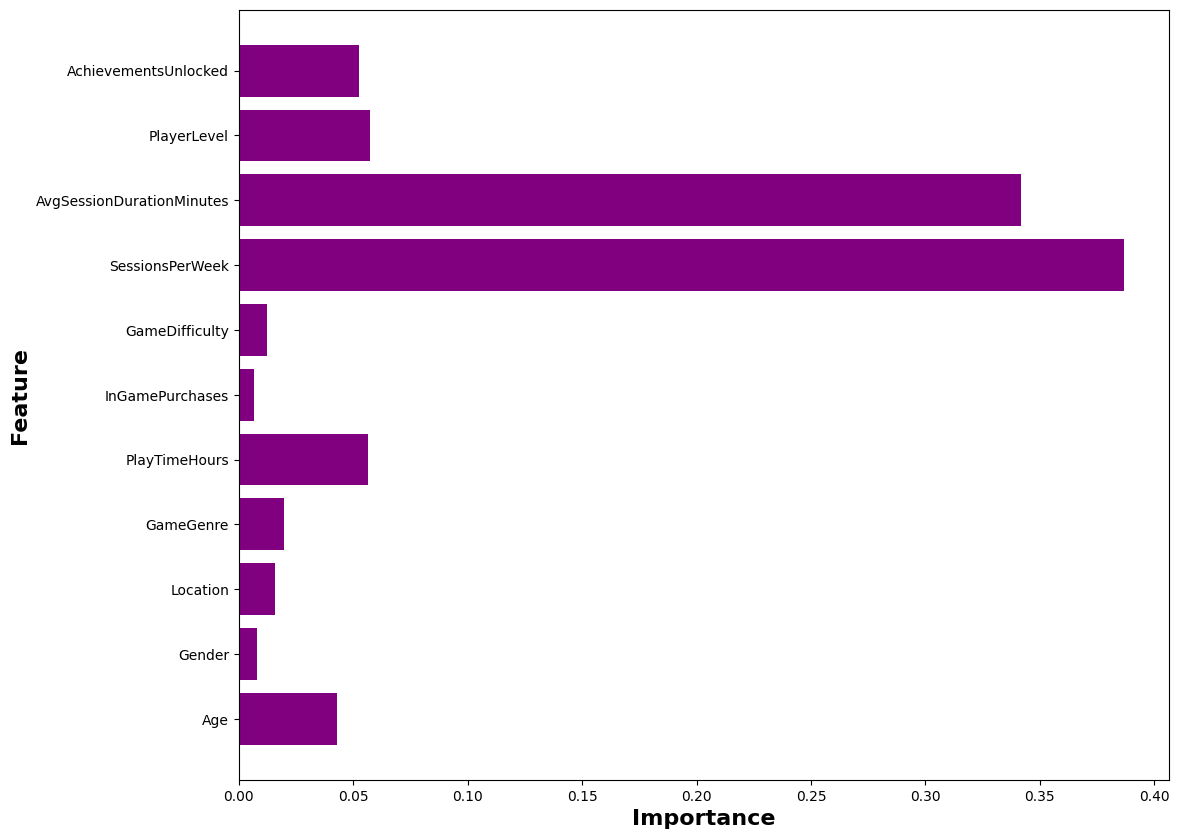

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(random_forest_feature_importances['Feature'],
         random_forest_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
random_forest_feature_importances[random_forest_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,Gender,0.0078
1,InGamePurchases,0.0065


### These 2 features have not contributed to model

## K-Nearest Neighbors (KNN) Classifier

### Getting the Error Rates of a Set of Models

In [ ]:
error_uniform = [] # error rates from models with uniformly distributed weights
error_distance = [] # error rates from models with distance based weights

k_range = range(1,31)

for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    knn_clf.fit(x_train, y_train)
    predictions = knn_clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))

    knn_clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn_clf.fit(x_train, y_train)
    predictions = knn_clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

### Plotting the Error Rates as a function of the Number of Neighbors

[]

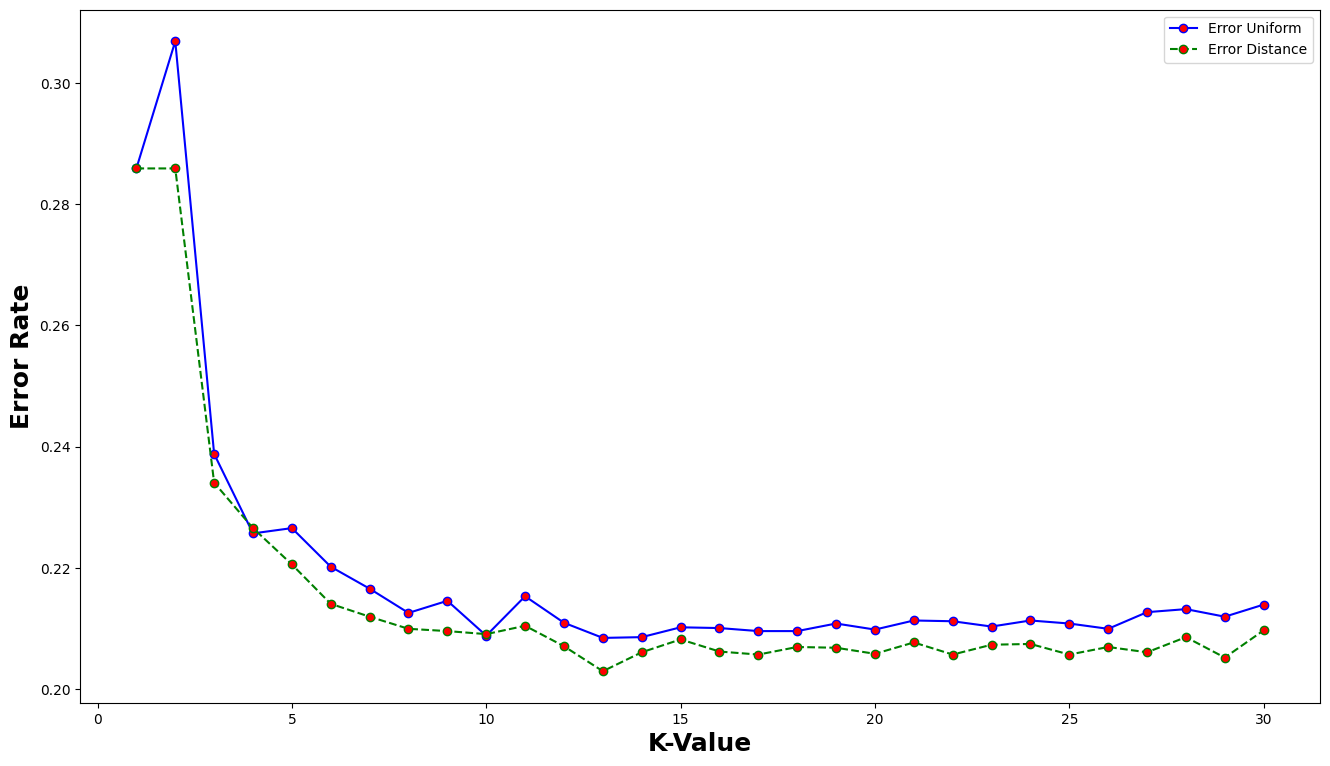

In [ ]:
plt.figure(figsize = (16,9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red', label = 'Error Uniform')

plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error Distance')

plt.legend()

plt.xlabel('K-Value', fontsize = 18, weight = 'bold')
plt.ylabel('Error Rate', fontsize = 18, weight = 'bold')

plt.plot()

### choose ---> weights = 'distance' , n_neighbors = 13

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 13, weights = 'distance')

knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

### Predictions based on test data

In [ ]:
knn_predictions = knn_clf.predict(x_test)

print('High', sum(knn_predictions == 0))
print('Low', sum(knn_predictions == 1))
print('Medium', sum(knn_predictions == 2))

High 1935
Low 1517
Medium 4555


### Confusion Matrix

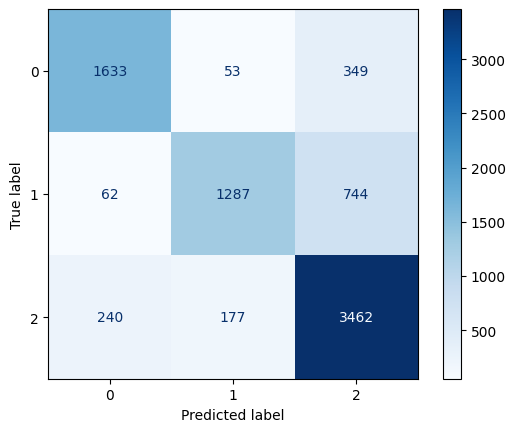

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions,
                                        labels = knn_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2035
           1       0.85      0.61      0.71      2093
           2       0.76      0.89      0.82      3879

    accuracy                           0.80      8007
   macro avg       0.82      0.77      0.79      8007
weighted avg       0.80      0.80      0.79      8007



## Accuracy of Model: 0.80 = 80%

### Model fails to predict 'Low'

## Gradient Boosting Classifier

In [ ]:
GB_clf = GradientBoostingClassifier(ccp_alpha = 0.0001, learning_rate = 1, random_state = 42)

GB_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0001, learning_rate=1, random_state=42)

### Predictions based on test data

In [ ]:
GBC_predictions = GB_clf.predict(x_test)

print('High', sum(GBC_predictions == 0))
print('Low', sum(GBC_predictions == 1))
print('Medium', sum(GBC_predictions == 2))

High 2013
Low 1962
Medium 4032


### Confusion Matrix

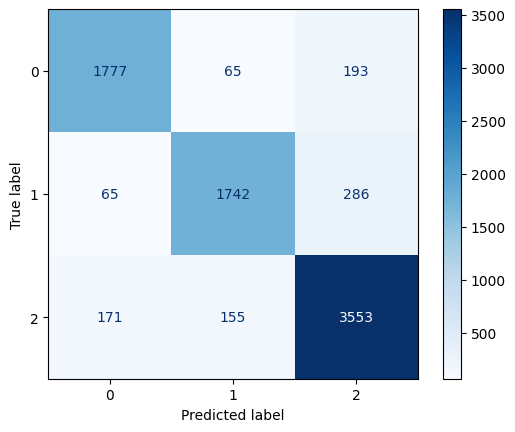

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, GBC_predictions,
                                        labels = GB_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, GBC_predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2035
           1       0.89      0.83      0.86      2093
           2       0.88      0.92      0.90      3879

    accuracy                           0.88      8007
   macro avg       0.88      0.87      0.88      8007
weighted avg       0.88      0.88      0.88      8007



## Accuracy of Model: 0.88 = 88%

### Feature Enginnering

In [ ]:
GBC_feature_importances = pd.DataFrame({'Feature': GB_clf.feature_names_in_ ,
                                        'Importance': GB_clf.feature_importances_})

GBC_feature_importances['Importance'] = GBC_feature_importances['Importance'].round(4)

GBC_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,AvgSessionDurationMinutes,0.5186
1,SessionsPerWeek,0.4714
2,PlayerLevel,0.0058
3,AchievementsUnlocked,0.0042
4,Age,0.0000
5,Gender,0.0000
6,Location,0.0000
7,GameGenre,0.0000
8,PlayTimeHours,0.0000
9,InGamePurchases,0.0000


### Visualizing of Feature Importances

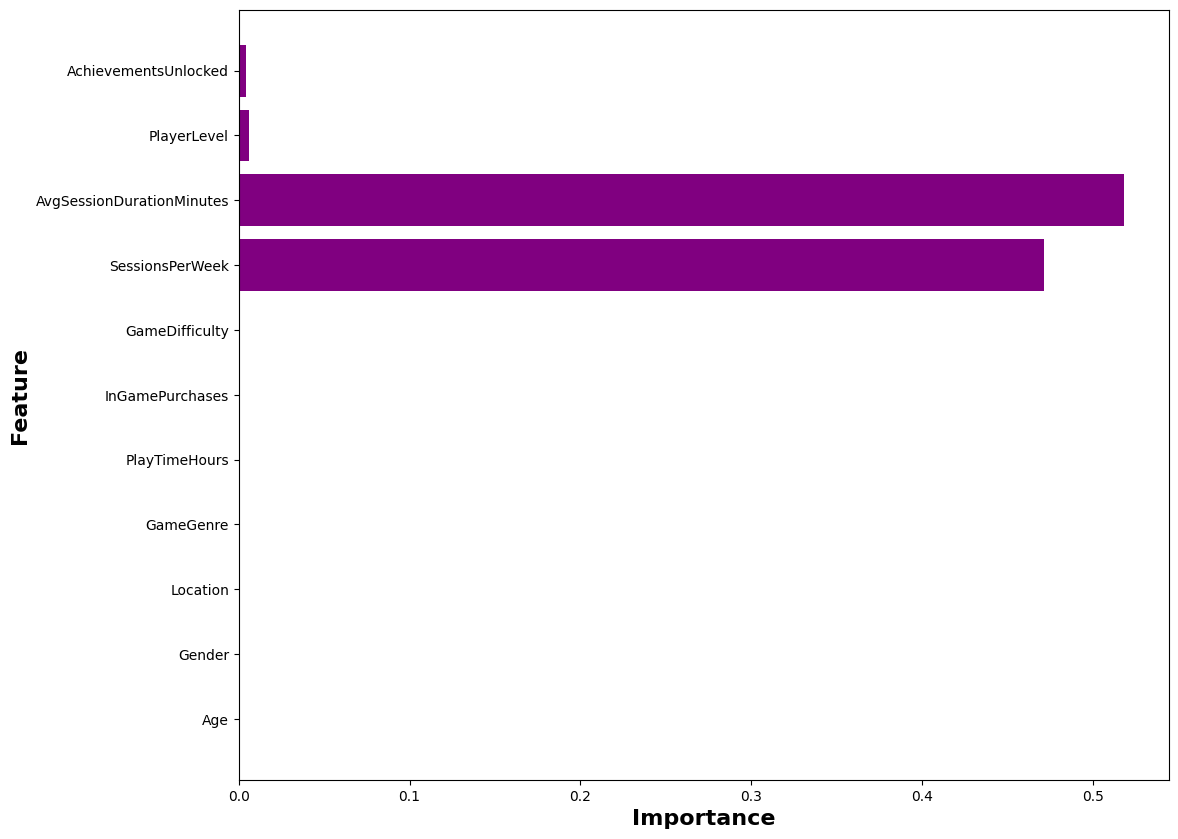

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(GBC_feature_importances['Feature'],
         GBC_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
GBC_feature_importances[GBC_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,Age,0.0000
1,Gender,0.0000
2,Location,0.0000
3,GameGenre,0.0000
4,PlayTimeHours,0.0000
5,InGamePurchases,0.0000
6,GameDifficulty,0.0000
7,PlayerLevel,0.0058
8,AchievementsUnlocked,0.0042


### These 9 features have not contributed to model

## Ada Boost Classifier

In [ ]:
AB_clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.9, n_estimators = 100, random_state = 42)

AB_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9, n_estimators=100,
                   random_state=42)

### Predictions based on test data

In [ ]:
AB_predictions = AB_clf.predict(x_test)

print('High', sum(AB_predictions == 0))
print('Low', sum(AB_predictions == 1))
print('Medium', sum(AB_predictions == 2))

High 1655
Low 1745
Medium 4607


### Confusion Matrix

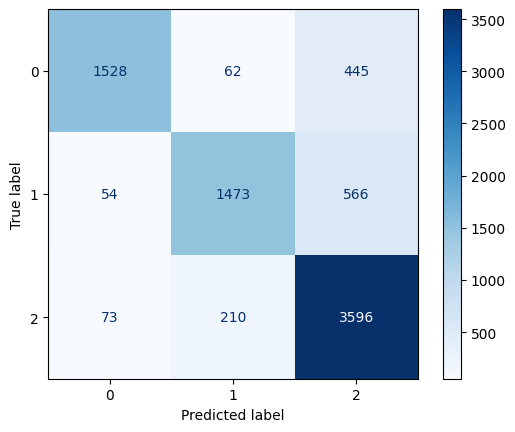

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, AB_predictions,
                                        labels = AB_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, AB_predictions))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2035
           1       0.84      0.70      0.77      2093
           2       0.78      0.93      0.85      3879

    accuracy                           0.82      8007
   macro avg       0.85      0.79      0.81      8007
weighted avg       0.83      0.82      0.82      8007



## Accuracy of Model: 0.82 = 82%

### Feature Engineering

In [ ]:
AdaBoost_feature_importances = pd.DataFrame({'Feature': AB_clf.feature_names_in_ ,
                                            'Importance': AB_clf.feature_importances_})

AdaBoost_feature_importances['Importance'] = AdaBoost_feature_importances['Importance'].round(4)

AdaBoost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,SessionsPerWeek,0.5076
1,AvgSessionDurationMinutes,0.4440
2,AchievementsUnlocked,0.0273
3,PlayerLevel,0.0210
4,Age,0.0000
5,Gender,0.0000
6,Location,0.0000
7,GameGenre,0.0000
8,PlayTimeHours,0.0000
9,InGamePurchases,0.0000


### Visualizing of Feature Importances

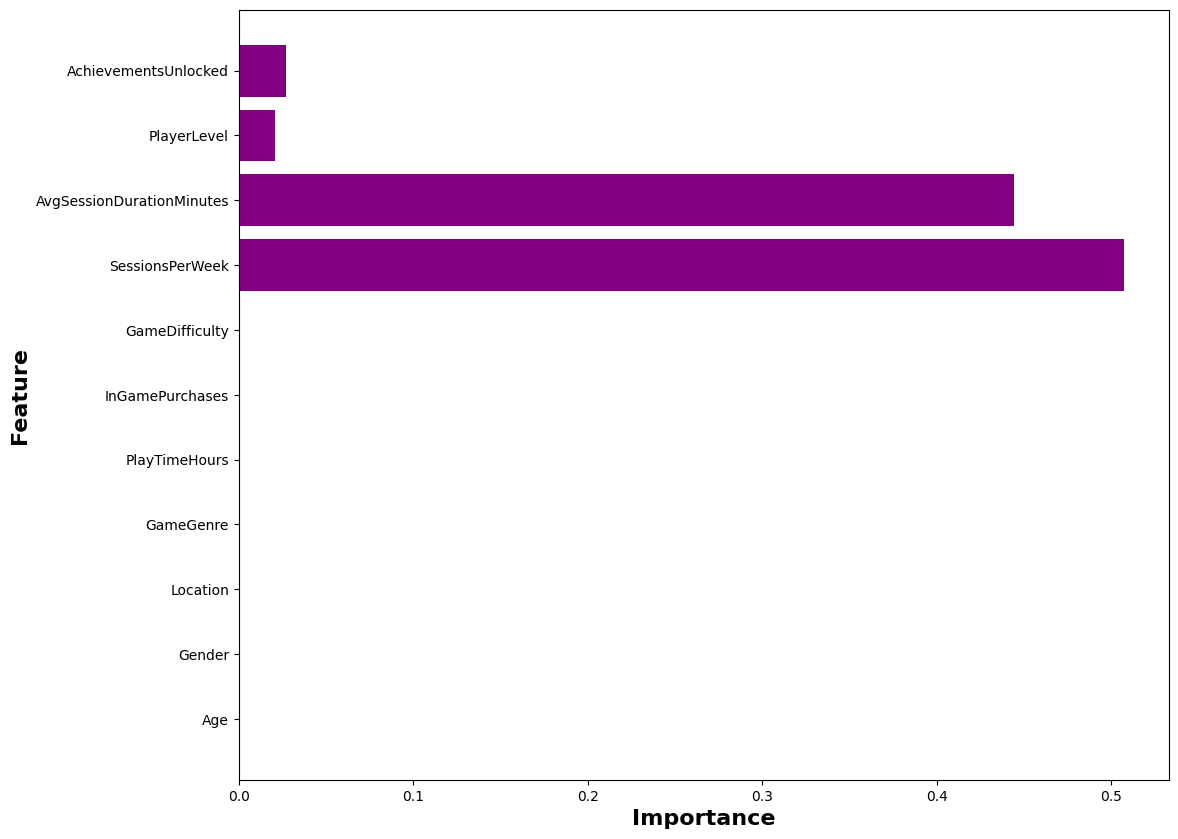

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(AdaBoost_feature_importances['Feature'],
         AdaBoost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
AdaBoost_feature_importances[AdaBoost_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,Age,0.0
1,Gender,0.0
2,Location,0.0
3,GameGenre,0.0
4,PlayTimeHours,0.0
5,InGamePurchases,0.0
6,GameDifficulty,0.0


### These 7 features have not contributed to model

## Bagging Classifier

In [ ]:
bagging_clf = BaggingClassifier(n_estimators = 12)

bagging_clf.fit(x_train, y_train)

BaggingClassifier(n_estimators=12)

### Predictions based on test data

In [ ]:
bagging_predictions = bagging_clf.predict(x_test)

print('High', sum(bagging_predictions == 0))
print('Low', sum(bagging_predictions == 1))
print('Medium', sum(bagging_predictions == 2))

High 1976
Low 2068
Medium 3963


### Confusion Matrix

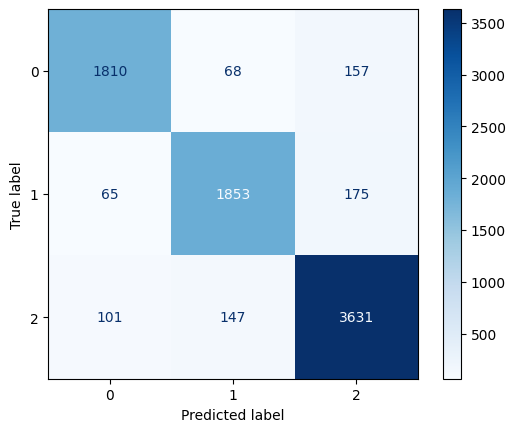

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, bagging_predictions,
                                        labels = bagging_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, bagging_predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2035
           1       0.90      0.89      0.89      2093
           2       0.92      0.94      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



## Accuracy of Model: 0.91 = 91%

## LGBM Classifier

In [ ]:
LGBM_clf = LGBMClassifier(learning_rate = 0.1)

LGBM_clf.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 32027, number of used features: 11
[LightGBM] [Info] Start training from score -1.350203
[LightGBM] [Info] Start training from score -1.358672
[LightGBM] [Info] Start training from score -0.726062


LGBMClassifier()

### Predictions based on test data

In [ ]:
LGBM_predictions = LGBM_clf.predict(x_test)

print('High', sum(LGBM_predictions == 0))
print('Low', sum(LGBM_predictions == 1))
print('Medium', sum(LGBM_predictions == 2))

High 1962
Low 2041
Medium 4004


### Confusion Matrix

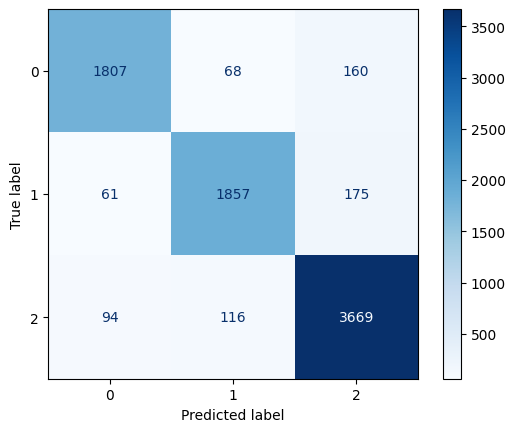

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, LGBM_predictions,
                                        labels = LGBM_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, LGBM_predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2035
           1       0.91      0.89      0.90      2093
           2       0.92      0.95      0.93      3879

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



## Accuracy of Model: 0.92 = 92%

### Feature Enginnering

In [ ]:
LGBM_feature_importances = pd.DataFrame({'Feature': LGBM_clf.feature_name_,
                                        'Importance': LGBM_clf.feature_importances_})


LGBM_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,AvgSessionDurationMinutes,1986
1,SessionsPerWeek,1551
2,PlayerLevel,1484
3,AchievementsUnlocked,1335
4,PlayTimeHours,1070
5,Age,715
6,GameGenre,258
7,Location,236
8,GameDifficulty,185
9,Gender,102


### Visualizing of Feature Importances

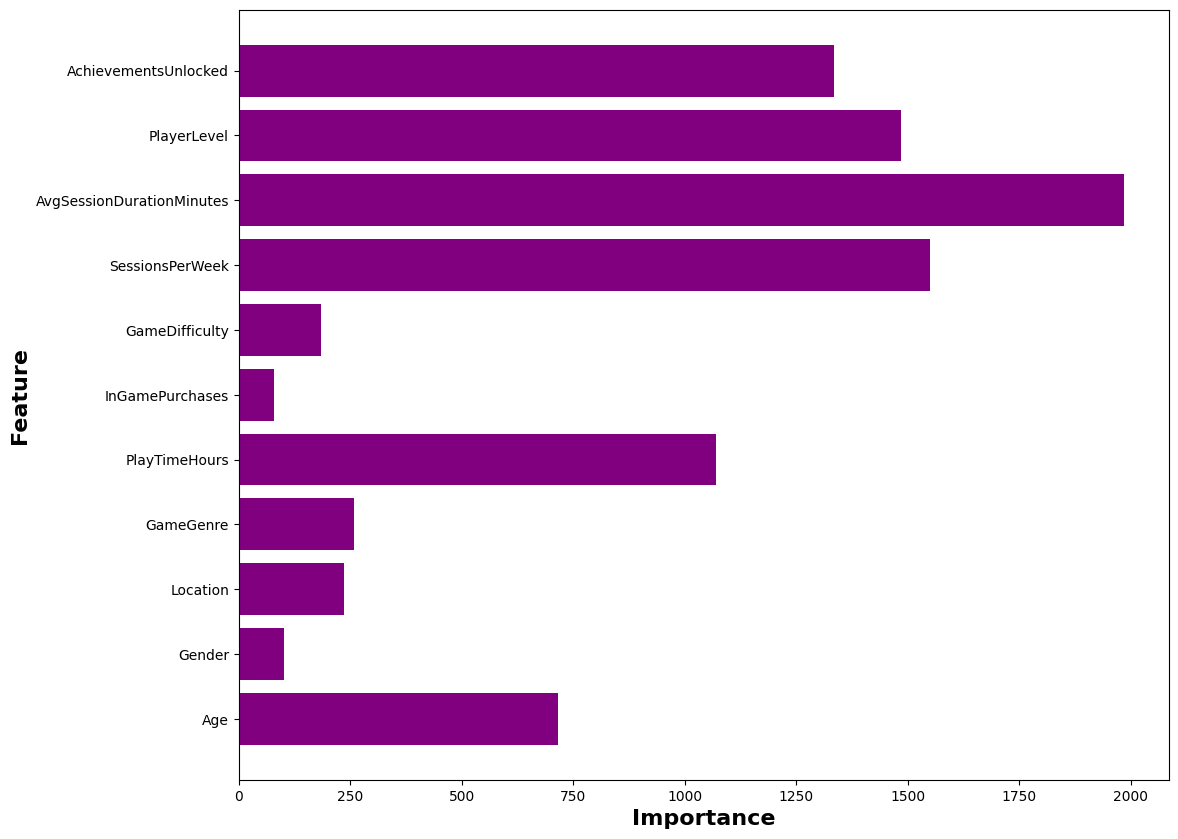

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(LGBM_feature_importances['Feature'],
         LGBM_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

## XGBoost Classifier

In [ ]:
XGBoost_clf = XGBClassifier(objective = 'multi:softprob', learning_rate = 1, n_estimators = 100, random_state = 42)

XGBoost_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Predictions based on test data

In [ ]:
XGB_predictions = XGBoost_clf.predict(x_test)

print('High', sum(XGB_predictions == 0))
print('Low', sum(XGB_predictions == 1))
print('Medium', sum(XGB_predictions == 2))

High 1963
Low 2022
Medium 4022


### Confusion Matrix

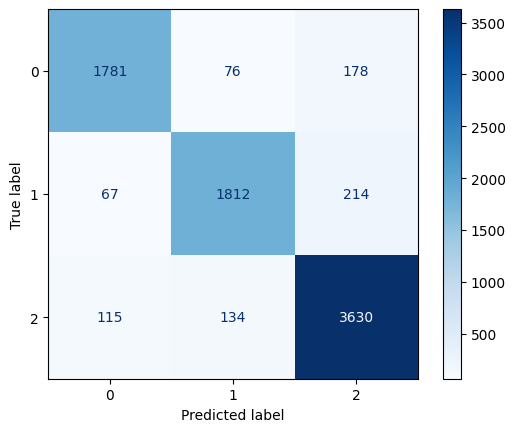

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_predictions,
                                        labels = XGBoost_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2035
           1       0.90      0.87      0.88      2093
           2       0.90      0.94      0.92      3879

    accuracy                           0.90      8007
   macro avg       0.90      0.89      0.90      8007
weighted avg       0.90      0.90      0.90      8007



## Accuracy of Model: 0.90 = 90%

### Feature Enginnering

In [ ]:
XGBoost_feature_importances = pd.DataFrame({'Feature': XGBoost_clf.feature_names_in_ ,
                                            'Importance': XGBoost_clf.feature_importances_})

XGBoost_feature_importances['Importance'] = XGBoost_feature_importances['Importance'].round(4)

XGBoost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,SessionsPerWeek,0.4008
1,AvgSessionDurationMinutes,0.2931
2,AchievementsUnlocked,0.0489
3,PlayerLevel,0.0448
4,Location,0.0316
5,PlayTimeHours,0.0309
6,InGamePurchases,0.0306
7,GameGenre,0.0304
8,Age,0.0300
9,Gender,0.0297


### Visualizing of Feature Importances

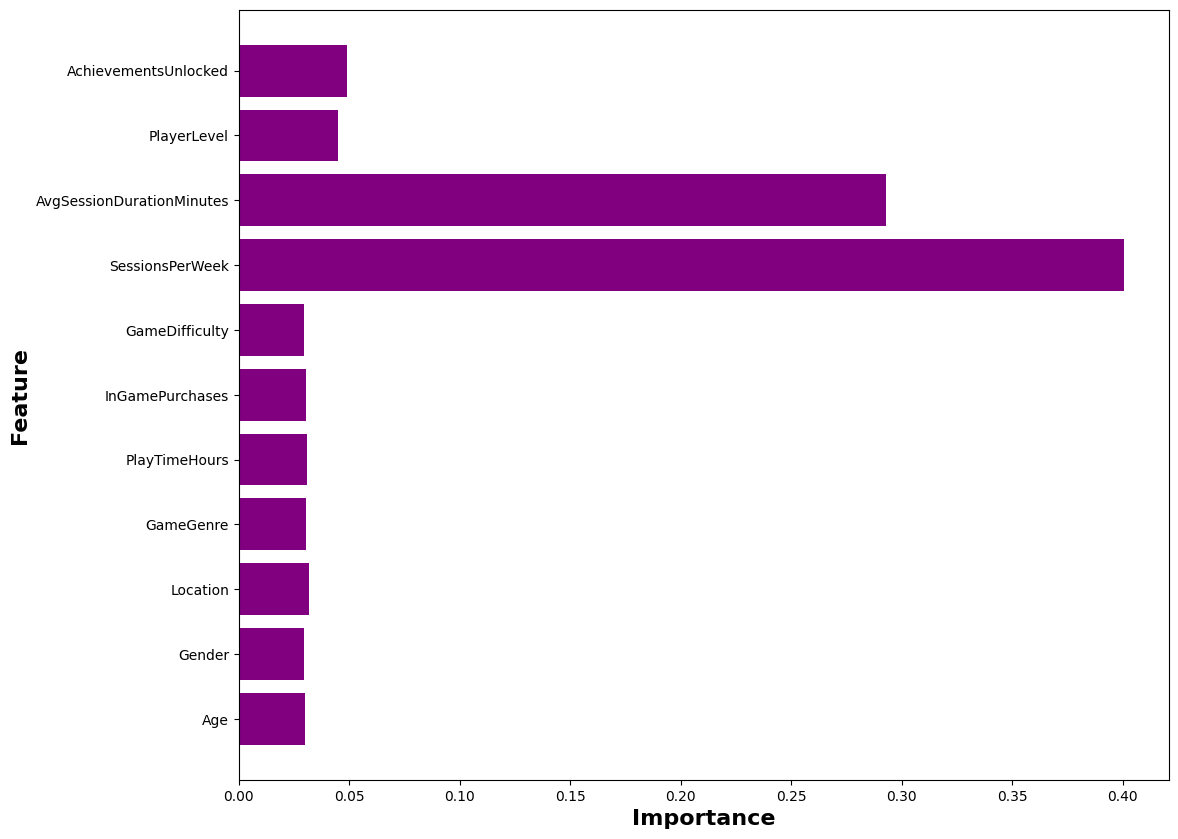

In [ ]:
plt.figure(figsize = (12,10))

plt.barh(XGBoost_feature_importances['Feature'],
         XGBoost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [ ]:
XGBoost_feature_importances[XGBoost_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance


## Comparison of Models

In [ ]:
Model_Comparison_Table = pd.DataFrame(data = [accuracy_score(y_test, decision_tree_predictions),
                                              accuracy_score(y_test, random_forest_predictions),
                                              accuracy_score(y_test, knn_predictions),
                                              accuracy_score(y_test, GBC_predictions),
                                              accuracy_score(y_test, AB_predictions),
                                              accuracy_score(y_test, bagging_predictions),
                                              accuracy_score(y_test, LGBM_predictions),
                                              accuracy_score(y_test, XGB_predictions)
                                              ],
                                      index = ['Decision Tree','Random Forest','KNN',
                                               'Gradient Boosting','Ada Boost','Bagging',
                                               'LGBM','XGBoost'],
                                      columns = ['Accuracy'])

In [ ]:
Model_Comparison_Table['Accuracy'] = Model_Comparison_Table['Accuracy'].round(2)

Model_Comparison_Table.sort_values(by = ['Accuracy'], ascending = False)

,Accuracy
LGBM,0.92
Random Forest,0.91
Bagging,0.91
XGBoost,0.90
Decision Tree,0.89
Gradient Boosting,0.88
Ada Boost,0.82
KNN,0.80
